# Отток клиентов.


Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо предугадать, покинет ли клиент банк в ближайшее время или нет. Нам были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Загрузка необходимых библиотек

In [58]:
#Импортируем необходимые библиотеки
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

# Первичный обзор данных.

In [4]:
#Сохраним файл в переменную
df = pd.read_csv(r"//Users/a1/Desktop/Мои проекты/Отток клентов ML бета - банк/Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
#Применим метод для краткого описания характеристик столбцов датасета 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В целом по характеристикам всё выглядит соответствующим образом, возраст от 18 до 92 лет, у самого молодого пользователя сооответствующий кредитный рейтинг и баланс, очень маленькая ожидаемая зарплата в связи с тем, что скорее всего пользователь еще не устроился на работу. Около 50% пользователей имеют на счте более 97,000. Средняя ожидаемая зарплата около 100,000. По столбцу с балансом можно отметить, что имеется скошенность распределения влево, по скольку среднее значение баланса меньше медианы. Касательно возраста можно заметить что среднее = 38 лет, а стандартное отклонение 10 лет, максимальное значение 92 года, данный возраст находится за пределами 3х стандартных отклонений, можно было бы сказать, что это статистический выброс, но в мире люди в таком возрасте вполне могут пользоваться банковскими услугами, поэтому такое значение оставим

In [6]:
#Выведем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Набор данных содержит следующие столбцы с информацией: 

`RowNumber` - Индекс строки в данных

`CustomerId` - Уникальный идентификатор клиента

`Surname` - Фамилия

`CreditScore` - Кредитный рейтинг

`Geography` - Страна проживания

`Gender` - Пол

`Age` - Возраст

`Tenure` - Сколько лет человек является клиентом банка

`Balance` - Баланс на счёте

`NumOfProducts` - Количество продуктов банка, используемых клиентом

`HasCrCard` - Наличие кредитной карты

`IsActiveMember` - Активность клиента

`EstimatedSalary` - Предполагаемая зарплата

`Exited` - Факт ухода клиента (Наш целевой признак)

Можем заметить, что в нашем датасете 10000 строк и 14 колонок, в колонке Tenure есть пропуски, которые составляют чуть меньше 10% от объема строк, от данных значений можно избавиться, либо заполнить медианой. По типам данных всё соответствует действительности.

# Предобработка данных.

In [7]:
#Проверим данные на дубликаты
df.duplicated().sum()

0

In [8]:
#Посчитатем медиану для столбца 'Tenure'
df['Tenure'].median()

5.0

По медиане клиенты пользуются банком 5 лет, в целом можем заполнить данным значением пропущенные значения в нашем датасете

In [9]:
#Заменим значения количества недвижимости равные NaN на 0
df = df.fillna(df['Tenure'].median())

In [10]:
# <поменяем тип на целочисленный>
df['Tenure'] = df['Tenure'].astype('int64')

В целом здесь же мы можем посмотреть на распределние столбца 'EstimatedSalary', чтобы посмотреть на выбросы

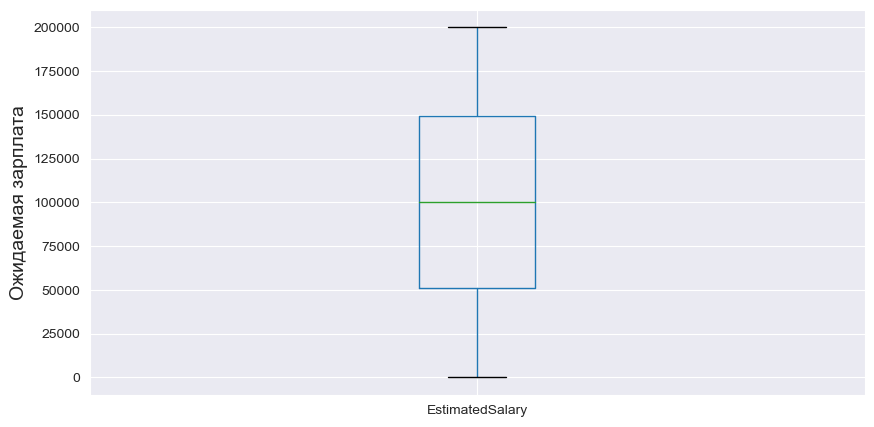

In [13]:
df.boxplot(['EstimatedSalary'], figsize=(10,5))
plt.ylabel('Ожидаемая зарплата', fontsize=14)
plt.show()

"Ящик с усами" отбразил, что все значения находятся в межквартильном размахе, выбросов не наблюдается, медиана на уровне 100000

# Исследовательский анализ данных.

Основная цель данного проекта состоит в построении прогноза, уйдёт клиент из банка в ближайшее время или нет, и в целом в данных нет ничего необычного, можно было и перейти сразу к построению модели и проверке метрик, но было бы неплохо рассмотреть информацию более детально, чтобы отправить итог по исследовательскому анализу в соответствующие департаменты.

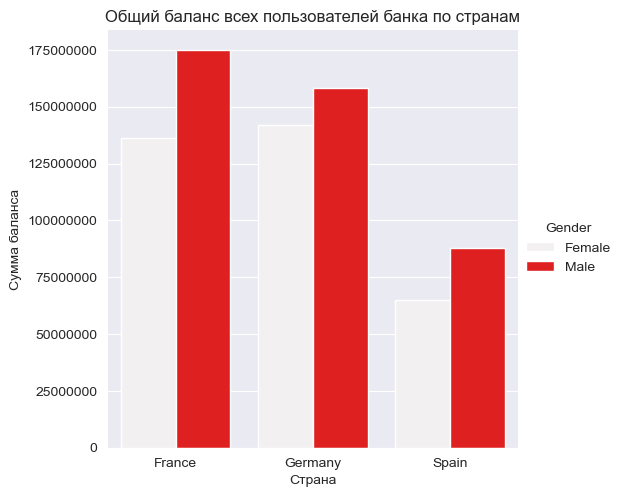

In [14]:
#Посчитаем общий баланc пользователй банка по странам и построим график
df_sum_balance = df.groupby(['Geography','Gender'],as_index=False).agg({'Balance':'sum'})

sns.catplot(data=df_sum_balance,kind="bar", x="Geography", y="Balance",hue='Gender', color='red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Общий баланс всех пользователей банка по странам')
plt.xlabel('Страна')
plt.ylabel('Сумма баланса')
plt.show()

Можно сделать вывод, что основными вкладчиками банка являются пользователи из Франции и Германии, интересно, что пользователи женского пола хранят больше денег, чем мужчины

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


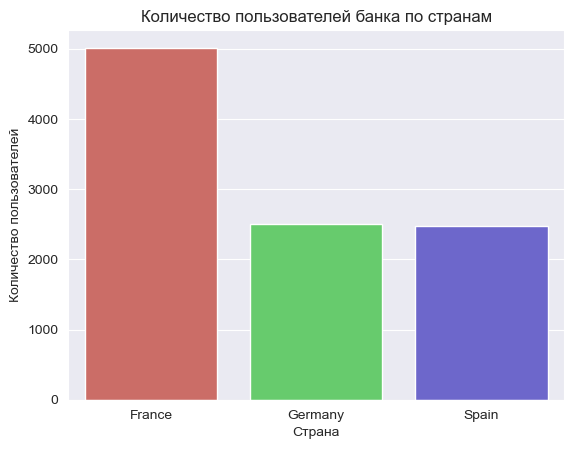

In [16]:
#Посчитаем общее количество пользователей банка по странам и построим график
df_country_users = df.groupby('Geography',as_index=False).agg({'CustomerId':'count'})

sns.barplot(data=df_country_users, x="Geography", y="CustomerId", palette='hls')
plt.title('Количество пользователей банка по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.show()

Около 5000 пользователей из Франции, 2500 пользователей из Германии и примерно столько же из Испании

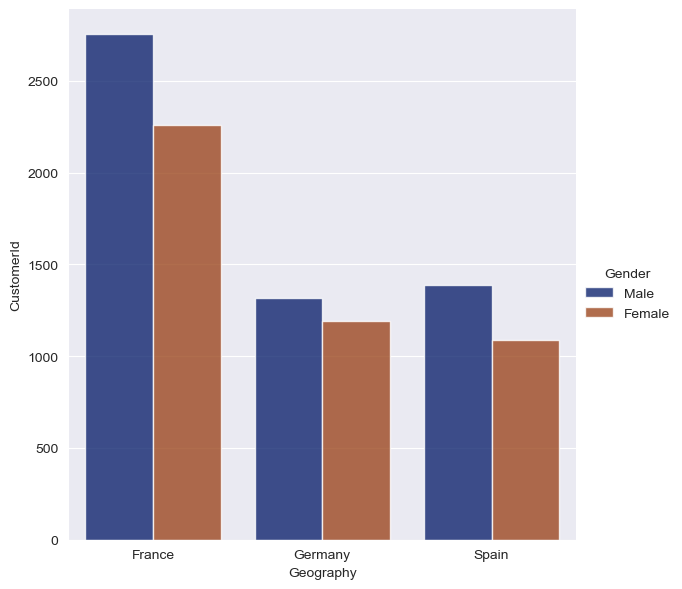

In [17]:
#Также посчитаем количество пользователей по странам, но с разбивкой по полу.
df_gender_countries = df.groupby(['Geography','Gender'],as_index=False).agg({'CustomerId':'count'}).sort_values(by='Gender',ascending=False)

sns.catplot(data=df_gender_countries, kind="bar",x="Geography", y="CustomerId", hue="Gender",errorbar="sd", palette="dark", alpha=.8, height=6)
plt.show()

Отсюда следует, что и пользователей женского пола по всем странам немного больше, отсюда и выходит такая сумма вкладов

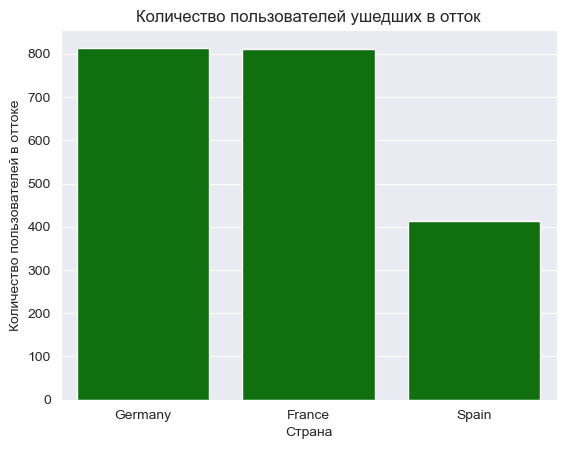

In [18]:
#Количество пользователей, которые ушли в отток.
df_exited_sum = df.query('Exited == 1').groupby(['Geography'], as_index=False).agg({'Exited':'count'}).sort_values(by='Exited',ascending=False)

sns.barplot(data=df_exited_sum, x="Geography", y="Exited", color='green')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Количество пользователей ушедших в отток')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей в оттоке')
plt.show()

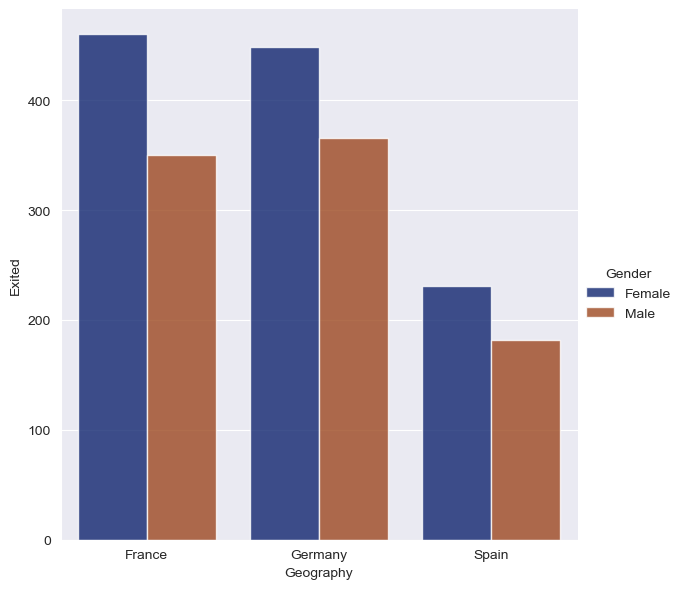

In [20]:
# Определим количество пользователей, ушедших в отток по полу и по странам
df_gender_exited = df.query('Exited == 1').groupby(['Geography','Gender'],as_index=False).agg({'Exited':'count'}).sort_values(by='Exited',ascending=False)

sns.catplot(data=df_gender_exited, kind="bar",x="Geography", y="Exited", hue="Gender",errorbar="sd", palette="dark", alpha=.8, height=6)
plt.show()

Большинство пользователей, ушедших в отток, являются пользователи мужского пола, примерно по 450 человек из стран Франции и Германии, а также примерно 250 пользователей из Испании

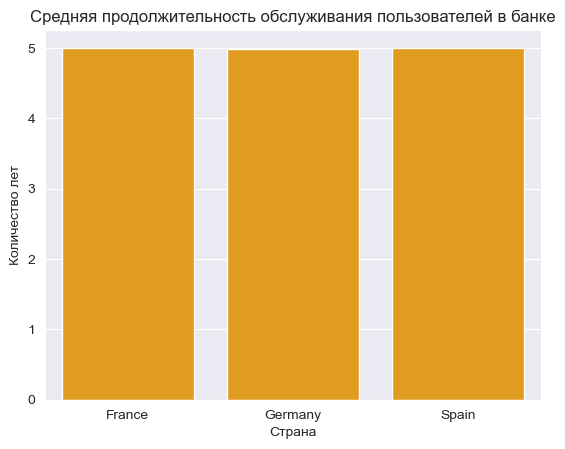

In [21]:
df_mean_tenure_users = df.groupby('Geography',as_index=False).agg({'Tenure':'mean'})

sns.barplot(data=df_mean_tenure_users, x="Geography", y="Tenure", color='orange')
plt.title('Средняя продолжительность обслуживания пользователей в банке')
plt.xlabel('Страна')
plt.ylabel('Количество лет')
plt.show()

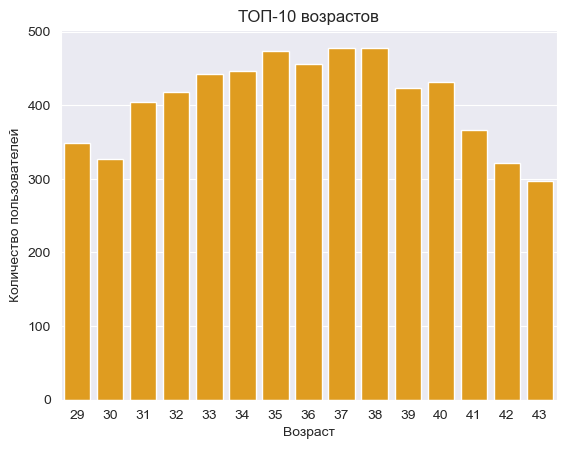

In [22]:
df_age = df.groupby('Age', as_index=False)['Surname'].count().sort_values(by='Surname', ascending=False).head(15)
sns.barplot(data=df_age, x="Age", y="Surname", color='orange')
plt.title('ТОП-10 возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

# Построение модели

Создадим новый датафрейм, удалим из него столбцы Surname, RowNumber и СustomerID, которые не влияют на столбец Exited.


In [24]:
#сбросим два столбца, которые не помогут нам предсказать целевой признак>
df_ohe = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)
df_ohe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Для преобразования категориальных признаков в количественные с помощью прямого кодирования (OHE), мы можем использовать метод `.get_dummies`. Установим аргумент `drop_first = True`, чтобы избежать дамми-ловушки, где один из столбцов фиктивных переменных для каждого признака будет удален.

In [25]:
# <Преобразуем категориальные признаки в фиктивные переменные, и сбросим по одному из них у каждого признака.>
df_ohe = pd.get_dummies(df_ohe, drop_first=True)

In [26]:
#<Посмотрим первые 5 строк преобразованного датафрейма
print(df_ohe.info())
df_ohe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.6 KB
None


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Мы разделим наши данные на две части: обучающую+валидационную выборки и тестовую выборку в соотношении 4:1. Для улучшения оценки модели, мы также попробуем использовать кросс-валидацию, указав соответствующий аргумент в методе GridSearchCV.

In [33]:
#Разделим обучающий датафрейм на features и target - целевой признак
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

#Поделим датафрейм на обучающую выборку + валидационную выборку (которая далее будет использована для кросс-валидации) и тестовую выборку.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Проведем масштабирование признаков:

In [28]:
#конкретизируем какие признаки будем масшатбировать
numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

**Вывод:**
- Мы провели анализ данных и заполнили пропущенные значения наиболее очевидным образом.
- Для улучшения обработки данных мы изменили тип некоторых признаков на целочисленный, что более подходит для количественных данных, например, для количества недвижимости.
- Провели исследовательский анализ данных, в котором рассмотрели баланс и отток пользователей, также рассмотрели распределение возрастов пользователей
- Мы удалили из датафрейма столбцы, которые не предоставляют полезной информации для вычисления целевого признака.
- Преобразовали категориальные признаки в количественные с помощью метода прямого кодирования (OHE), создав новые количественные фиктивные переменные для этих признаков.
- Произвели масштабирование признаков для того, чтобы значения признаков не влияли на обучение алгоритма в большей мере только из-за своей абсолютной величины.
- Для оценки модели мы разделили данные на обучающую+валидационную выборки и тестовую выборку. Первую мы использовали для обучения и валидации модели при переборе гиперпараметров с помощью метода GridSearchCV, который позволяет исследовать множество комбинаций гиперпараметров.

# Исследование задачи

Исследуем баланс классов:

0    0.7963
1    0.2037
Name: Exited, dtype: float64


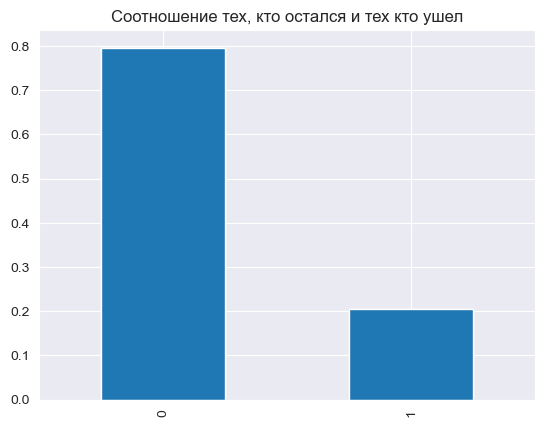

In [30]:
class_frequency = target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', title='Соотношение тех, кто остался и тех кто ушел')
plt.show()

Мы столкнулись с дисбалансом классов, где 80% клиентов остаются в банке, что создает неравномерное распределение данных. Несмотря на это, мы попытаемся обучить модель, применяя метод GridSearchCV для подбора параметров модели дерева принятия решений.

В коде:

- Параметр `param_grid` представляет собой словарь, в котором указываются гиперпараметры и диапазоны их значений или конкретные значения в случае категориальных признаков.
- В `np.arange` первый и второй аргументы указывают начало и конец последовательности, а третий аргумент - шаг. Например, `np.arange(0.5, 1, 0.1)` создает последовательность `[0.5, 0.6, 0.7, 0.8, 0.9]`.
- `max_leaf_nodes` определяет максимальное количество листовых узлов в дереве решений.
- `max_features` определяет количество признаков, которые следует учитывать при поиске лучшего разделения.
- `min_samples_split` определяет минимальное количество объектов, необходимое для выполнения разделения в узле.
- Параметр `cv` используется для кросс-валидации. Мы выбираем 4 блока, так как мы ранее использовали соотношение разделения на обучающую, валидационную и тестовую выборки 3:1:1. Таким образом, 4 фолда позволяют использовать три блока для обучения и один для валидации.
- Параметр `scoring` указывает метрику оценки модели, которая в данном случае является F1-мерой, рекомендуемой для моделей классификации.

In [31]:
%%time
#сетка гиперпараметров, по которой будет происходить исчерпывающий поиск
param_grid = {
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10]
}

#дерево принятия решений к которому будем подбирать параметры
estimator = DecisionTreeClassifier(random_state = 12345)

# модель
model = GridSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model.fit(features_train, target_train)

CPU times: user 30 s, sys: 268 ms, total: 30.3 s
Wall time: 30.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                       20],
                         'max_features': ['auto', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90, 100],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [32]:
# <среднее значение F1-меры по разным выборкам>
model.best_score_

0.5768289272865151

Оценка чуть выше средней, близка к оценке, к которой мы стремимся.

В этом блоке мы произвели вычисление AUC-ROC для модели с использованием кросс-валидации. Сначала мы импортировали необходимые библиотеки и функции, затем обработали данные, чтобы избежать проблем с NaN значениями. Далее, определили количество блоков для кросс-валидации (в данном случае 4), и вычислили AUC-ROC для каждого блока. После этого мы нашли среднее значение AUC-ROC по всем блокам, чтобы получить финальную оценку качества модели.

In [34]:
features_train = features_train.reset_index(drop = True)
target_train = target_train.reset_index(drop = True)

auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.8759092416093873

Эта оценка выше 0.5, а значит проходит проверку на адекватность. Но модель всё еще не идеальна.

In [35]:
# <набор параметров, которые подобрал исчерпывающий поиск по гиперпараметрам модели.>
model.best_params_

{'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': 70,
 'min_samples_split': 2}

Попробуем RandomizedSearchCV - случайный поиск по гиперпараметрам с моделью случайного леса.

* bootstrap - Бутстрэп-агрегирование или бэггинг, алгоритм предназначенный для улучшения стабильности и точности алгоритмов машинного обучения, также уменьшает дисперсию и помогает избежать переобучения.

In [36]:
%%time
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'n_estimators': list(np.arange(2, 101, 2).astype(int)),
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# <случайный лес к которому будем подбирать параметры>
estimator = RandomForestClassifier(random_state = 12345)

# <модель>
model_rf = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model_rf.fit(features_train, target_train)

CPU times: user 19.2 s, sys: 129 ms, total: 19.4 s
Wall time: 19.4 s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=12345),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      14, 16, 18, 20],
                                        'max_features': ['auto', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90,
                                                           100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 42, 44, 46, 48, 50,
                                                         52, 54, 56, 58, 60, ...]},
                   scoring='f1')

In [38]:
# <среднее значение F1-меры по разным выборкам>
model_rf.best_score_

0.5771719752372431

Оценка хуже чем у одного дерева принятия решений. Подсчитаем AUC-ROC:

In [39]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model_rf.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.8920550063860868

Оценка разнится в зависимости от отработки случайного поиска, но примерно равна таковой у дерева принятия решений.

In [40]:
# <набор параметров, которые подобрал исчерпывающий поиск по гиперпараметрам модели.>
model_rf.best_params_

{'n_estimators': 88,
 'min_samples_split': 5,
 'max_leaf_nodes': 60,
 'max_features': None,
 'max_depth': 20,
 'bootstrap': True}

Попробуем логистическую регрессию:

In [41]:
# <Создадим модель лог. регрессии,>
model_lr = LogisticRegression(random_state=12345)

# <Оценим качество модели, обученной в ходе перекрестной проверки>
score = cross_val_score(model_lr,features_train, target_train,cv=4,scoring='f1').mean()

# <обучаем модель> 
model_lr.fit(features_train, target_train)

# <выведем долю правильных ответов>
score

0.08952117874268846

Слабая оценка. В следующем пункте попробуем избавиться от дисбаланса, и снова обучить модель. Подсчитаем AUC-ROC:

In [42]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    
    probabilities_valid = model_lr.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.6682804804969497

Самая низкая оценка была получена на логистической регрессии.

**Вывод:**
* Мы провели анализ сбалансированности целевого признака и обнаружили дисбаланс.
* С использованием метода GridSearchCV мы нашли оптимальные гиперпараметры для модели дерева принятия решений.
* С применением метода RandomizedSearchCV мы подобрали гиперпараметры для модели случайного леса. Результат примерно совпадает с результатом модели дерева принятия решений.
* Попытка обучить логистическую регрессию привела к значительно худшей оценке по сравнению с "деревянными" алгоритмами.

Далее планируется устранить дисбаланс классов и повторно обучить модель.



# Борьба с дисбалансом

В данном цикле происходит перебор моделей дерева принятия решений с различными гиперпараметрами, затем идет оценка модели на валидационной выборке, используется кросс-валидация, написанную на питоне. Она была изучена в следующем спринте. Также происходит апсемплинг положительного класса.

Здесь и далее будет происходит перебор не всех возможных значений гиперпараметров

In [43]:
%%time
for depth in range(2,7,2):
    for samples in [2, 5, 10]:
        model = DecisionTreeClassifier(random_state=0, max_depth=depth, 
                                               min_samples_split = samples
                                               )
                
        sample_size = int(len(features_train)/4)
        scores = []
        
        for i in range(0, len(features_train), sample_size):
            valid_indexes = list(range(i, i + sample_size))
            train_indexes = list(range(0,len(features_train)))
                    
            del train_indexes[i:(i + sample_size)]
                    
            features_train_1 = features_train.loc[train_indexes,]
            features_valid = features_train.loc[valid_indexes,]
            target_train_1 = target_train.loc[train_indexes,]
            target_valid = target_train.loc[valid_indexes,]
                    
            features_train_1['Exited'] = target_train_1
                
            features_train_majority = features_train_1[features_train_1.Exited==0]
            features_train_minority = features_train_1[features_train_1.Exited==1]
                    
            features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
            features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
            target_train_upsampled = features_train_upsampled['Exited']
            features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
            model.fit(features_train_upsampled, target_train_upsampled)
            predictions = model.predict(features_valid)
            score = f1_score(target_valid, predictions)
            scores.append(score)
                    
            if i == (sample_size * 3):
                scores = pd.Series(scores)
                print('max_depth =',depth,'min_samples_split =',samples,': {:.4f}'.format(scores.mean()))

max_depth = 2 min_samples_split = 2 : 0.5133
max_depth = 2 min_samples_split = 5 : 0.5133
max_depth = 2 min_samples_split = 10 : 0.5133
max_depth = 4 min_samples_split = 2 : 0.5254
max_depth = 4 min_samples_split = 5 : 0.5254
max_depth = 4 min_samples_split = 10 : 0.5254
max_depth = 6 min_samples_split = 2 : 0.5607
max_depth = 6 min_samples_split = 5 : 0.5607
max_depth = 6 min_samples_split = 10 : 0.5606
CPU times: user 608 ms, sys: 24.2 ms, total: 632 ms
Wall time: 632 ms


Лучшая оценка у дерева с параметрами max_depth = 6, min_samples_split = 10. Она равна 0.5606. Она ниже чем у дерева, подобранного GridSearchCV. Но и гиперпараметров мы перебирали меньше. Подсчитаем AUC-ROC:

In [44]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.850895259357214

Далее опробуем тоже самое обучение на логистической регресии:

In [45]:
%%time
model = LogisticRegression()
                
sample_size = int(len(features_train)/4)
scores = []
        
for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
                    
    del train_indexes[i:(i + sample_size)]
                    
    features_train_1 = features_train.loc[train_indexes,]
    features_valid = features_train.loc[valid_indexes,]
    target_train_1 = target_train.loc[train_indexes,]
    target_valid = target_train.loc[valid_indexes,]
                    
    features_train_1['Exited'] = target_train_1
                
    features_train_majority = features_train_1[features_train_1.Exited==0]
    features_train_minority = features_train_1[features_train_1.Exited==1]
                    
    features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
    features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
    target_train_upsampled = features_train_upsampled['Exited']
    features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
    model.fit(features_train_upsampled, target_train_upsampled)
    predictions = model.predict(features_valid)
    score = f1_score(target_valid, predictions)
    scores.append(score)
                    
    if i == (sample_size * 3):
        scores = pd.Series(scores)
        print('f1_score =','{:.4f}'.format(scores.mean()))

f1_score = 0.4133
CPU times: user 193 ms, sys: 367 ms, total: 560 ms
Wall time: 139 ms


In [46]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.705549653345804

Результат улучшился и довольно сильно, баланс классов имеет большое значение для логистической регрессии.

Попробуем наш алгоритм перебора и обучения с апсемплингом на случайном лесе. Здесь установим гиперпараметры дерева те что подобрали у дерева принятия решений и будем перебирать только количество деревьев.

In [47]:
for est in range(10, 51, 10):
    for depth in range(1, 6):
        auc_roc_scores = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)

In [48]:
auc_roc_scores

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=12345)

In [49]:
%%time
for estimators in range(2,20,2):
    model = RandomForestClassifier(random_state=0, max_depth=6, 
                                               min_samples_split = 10,
                                               n_estimators = estimators)
                
    sample_size = int(len(features_train)/4)
    scores = []
        
    for i in range(0, len(features_train), sample_size):
        valid_indexes = list(range(i, i + sample_size))
        train_indexes = list(range(0,len(features_train)))
                    
        del train_indexes[i:(i + sample_size)]
                    
        features_train_1 = features_train.loc[train_indexes,]
        features_valid = features_train.loc[valid_indexes,]
        target_train_1 = target_train.loc[train_indexes,]
        target_valid = target_train.loc[valid_indexes,]
                    
        features_train_1['Exited'] = target_train_1
                
        features_train_majority = features_train_1[features_train_1.Exited==0]
        features_train_minority = features_train_1[features_train_1.Exited==1]
                    
        features_train_minority_upsampled = resample(features_train_minority, 
                                 replace=True,     
                                 n_samples=int(features_train_majority['Age'].count()),    
                                 random_state=123)
            
        features_train_upsampled = pd.concat([features_train_majority, features_train_minority_upsampled])
                    
                    
        target_train_upsampled = features_train_upsampled['Exited']
        features_train_upsampled = features_train_upsampled.drop('Exited', axis=1)
                    
        model.fit(features_train_upsampled, target_train_upsampled)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid, predictions)
        scores.append(score)
                    
        if i == (sample_size * 3):
            scores = pd.Series(scores)
            print('n_estimators =',estimators,': {:.4f}'.format(scores.mean()))

n_estimators = 2 : 0.5497
n_estimators = 4 : 0.5691
n_estimators = 6 : 0.5720
n_estimators = 8 : 0.5829
n_estimators = 10 : 0.5874
n_estimators = 12 : 0.5872
n_estimators = 14 : 0.5844
n_estimators = 16 : 0.5846
n_estimators = 18 : 0.5858
CPU times: user 1.79 s, sys: 38.5 ms, total: 1.83 s
Wall time: 1.85 s


In [50]:
auc_roc_scores = []

sample_size = int(len(features_train)/4)

for i in range(0, len(features_train), sample_size):
    valid_indexes = list(range(i, i + sample_size))
    train_indexes = list(range(0,len(features_train)))
    del train_indexes[i:(i + sample_size)]
    
    features_valid = features_train.loc[valid_indexes,]
    target_valid = target_train.loc[valid_indexes,]
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)    
    
    auc_roc_scores.append(auc_roc)

auc_roc_scores = pd.Series(auc_roc_scores)
final_score = auc_roc_scores.mean()
final_score

0.8757550750206693

Отличный результат, в качестве бонуса проверим, сможет ли class_weight = 'balanced' выдать результат лучше на валидационной выборке.

In [51]:
%%time
# <сетка гиперпараметров, по которой будет происходит случайный поиск>
param_grid = {
    'n_estimators': list(np.arange(2, 101, 2).astype(int)),
    'max_depth': [None] + list(np.arange(2, 21,2).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': [None] + list(np.arange(10, 101, 10).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# <случайный лес к которому будем подбирать параметры>
estimator = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')

# <модель>
model_rf = RandomizedSearchCV(estimator, param_grid, cv=4, scoring = 'f1')

# <обучаем модель> 
model_rf.fit(features_train, target_train)

# <среднее значение F1-меры по разным выборкам>
model_rf.best_score_

CPU times: user 12.8 s, sys: 156 ms, total: 13 s
Wall time: 13.5 s


0.6039960568930769

**Вывод:**
Мы обучили модели дерева принятия решений, случайного леса и логистической регресии, при обучении применяли кросс-валидацию, а также боролись с дисбалансом классов с помощью апсемплинга. Мы смогли добиться на валидационных выборках нужного нам результата, осталось проверить нашу сильнейшую модель на тестовой выборке.

# Тестирование модели

Проведем тестирование модели случайного леса (гиперпараметры для которого подбирались с помощью цикла) на тестовой выборке.

In [52]:
predictions = model.predict(features_test)

f1_score(target_test, predictions)

0.6398390342052314

Проведем тестирование модели случайного леса (гиперпараметры для которого подбирались случайным поиском) на тестовой выборке.


In [53]:
predictions = model_rf.predict(features_test)

f1_score(target_test, predictions)

0.6353421859039836

Случайный поиск по гиперпараметрам оказался сильнее. Подсчитаем AUC-ROC для обоих моделей. Сначала для первой:

In [54]:
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_valid)    
    
auc_roc

0.8663006144377233

Затем для второй:

In [55]:
probabilities_valid = model_rf.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_valid)    
    
auc_roc

0.8674395649060329

Ожидаемо вторая модель чуть-чуть сильнее.

# Вывод
Мы проверили наши сильнейшие модели на тестовой выборке. И они смогли дать высокое значение F1-меры, это хорошо.

In [56]:
rezult1 = {'Дерево Решения':np.array([0.586,0.582]),'Случайный лес':np.array([0.571,0.612]),'Логистическая регрессия':np.array([0.318,0.478])}
rezult_df = pd.DataFrame(rezult1,index=['F1: исключая дисбаланс','F1: с учетом дисбаланса'])

In [57]:
rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1: исключая дисбаланс,0.586,0.571,0.318
F1: с учетом дисбаланса,0.582,0.612,0.478


Рассматривая данные с учетом дисбаланса + переведенные категориальные + стандартизированные данные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=9,n_estimators=50, мы имеем F1 меру =0,612 на тестовой(валидной) выборке. Хуже всего себя показала модель Логистическая регрессия

In [5]:
num = 8

if num % 2 != 0:
    result = 'Это простое число'
else:
    result = 'Это не простое число'

In [6]:
result

'Это не простое число'

In [ ]:
while num % 2 != 0:
    result = 'Это простое число'
else:
    result = 'Это не простое число'